# Chap02 End-to-End Machine Learning Project

Your task is to predict median house values in Californian districts, given a number of features from these districts.


In [1]:
# Common imports
# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [2]:
# Load the data
housing = pd.read_csv("../data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Examine all the attibutes data firstly

Obeserve the data by every attibutes, understand every attribute meaning,range ,unit and distributions.

In this way, we can find out whether the data is reasonable and good enough for us to study.

In [4]:
attri_list = list(housing.columns)
attri_list[4]

'total_bedrooms'

In [5]:
housing[attri_list[0]].describe()

count    20640.000000
mean      -119.569704
std          2.003532
min       -124.350000
25%       -121.800000
50%       -118.490000
75%       -118.010000
max       -114.310000
Name: longitude, dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='Count'>

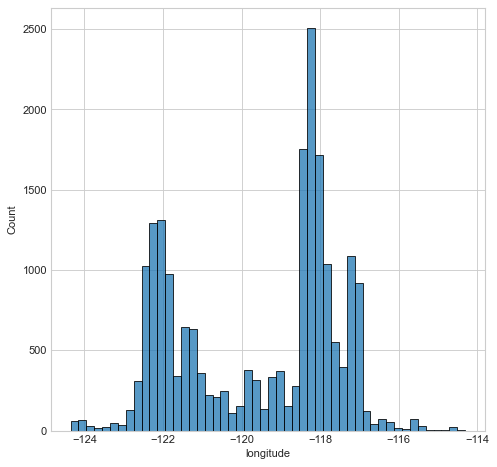

In [6]:
_, ax = plt.subplots(figsize=(7, 7), dpi=80)
sns.histplot(housing[attri_list[0]], bins=50, ax=ax)

In [7]:
housing[attri_list[1]].describe()

count    20640.000000
mean        35.631861
std          2.135952
min         32.540000
25%         33.930000
50%         34.260000
75%         37.710000
max         41.950000
Name: latitude, dtype: float64

<AxesSubplot:xlabel='latitude', ylabel='Count'>

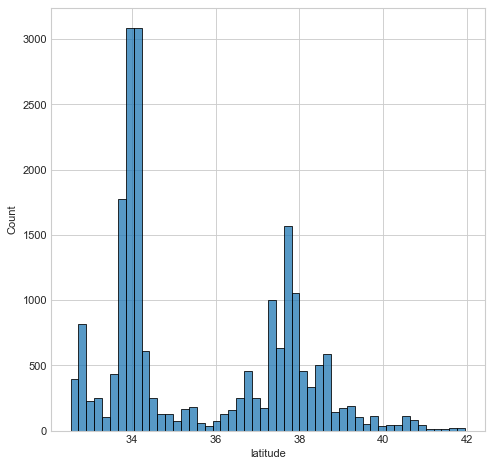

In [8]:
_, ax = plt.subplots(figsize=(7, 7), dpi=80)
sns.histplot(housing[attri_list[1]], bins=50, ax=ax)

Then we can checke every attribute in the dataset by this way.

Or , let's plot them together later.

total_bedrooms      20433 non-null  float64， 207 districts are missing this feature.

 ocean_proximity     20640 non-null  object ，we can research this feature to find out how many categories there are.


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


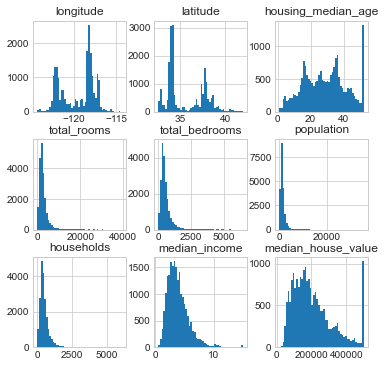

In [11]:
# pd histogram: a quick way to get a feel of the type of data
# you are dealing with is to plot a histogram for each numerical attribute.
housing.hist(bins=50, figsize=(6, 6))
plt.show()

In [12]:
labels = list(housing.iloc[:, i].name for i in range(0, 9))

In [13]:
# # Xs = [] is not suggested
# Xs = []
# for i in range(0,9):
#     x = housing.iloc[:,i]
#     Xs.append(x)
#     labels = list(housing.iloc[:,i].name)

In [14]:
len(housing.columns[:-1])

9

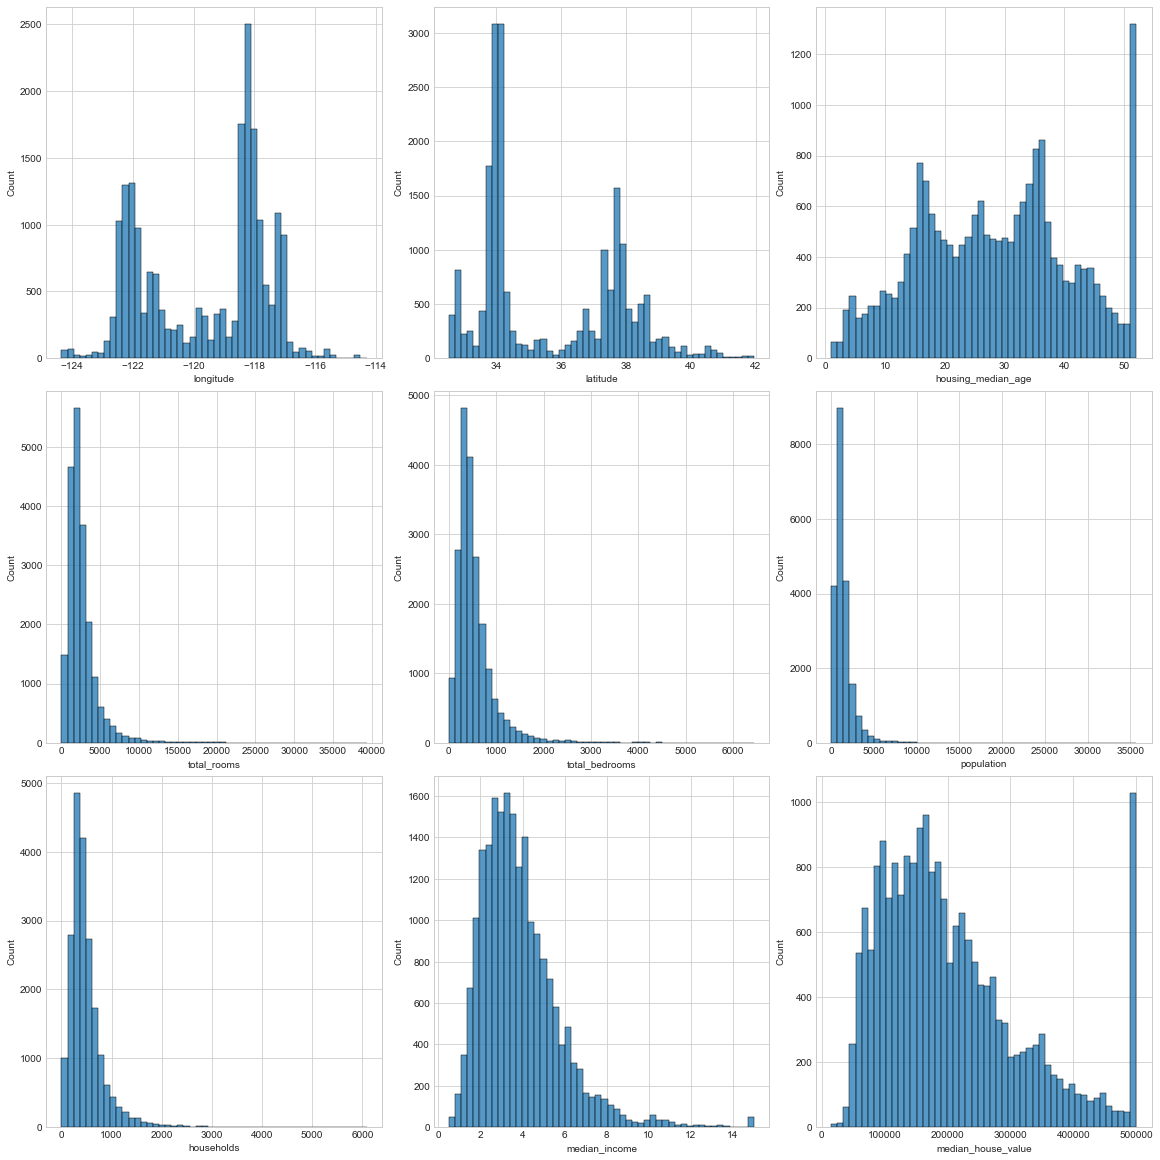

In [15]:
_, axes = plt.subplots(3, 3, figsize=(16, 16), constrained_layout=True)

for ax, col in zip(axes.flatten(), housing.columns[:-1]):
    sns.histplot(data=housing, x=col, bins=50, ax=ax)

$$\text{Figure 2-8. A histogram for each numerical attribute}$$


**There** are a few things you might notice in these histograms:

1. First, the median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the **data has been scaled and capped at 15** (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000). Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how the data was computed.

2. **The housing median age and the median house value were also capped**. The latter may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit.You need to check with your client team (the team that will use your system’s out‐put) to see if this is a problem or not. If they tell you that they need precise predictions even beyond $500,000, then you have two options:
        

- Collect proper labels for the districts whose labels were capped.

- **Remove those districts from the training set** (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).

3. These attributes have very different scales. 
        

4. Finally, **many histograms are tail-heavy:** they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distribution


## Create a Test Set


In [16]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [18]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


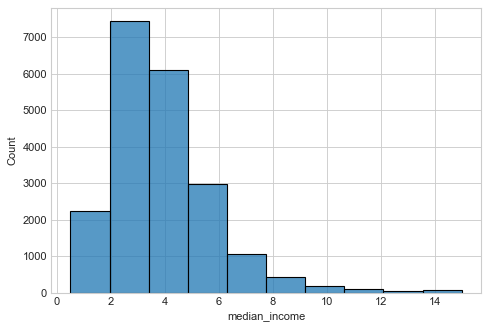

In [19]:
_, ax = plt.subplots(figsize=(6, 4), dpi=80, constrained_layout=True)

sns.histplot(data=housing, x="median_income", bins=10, ax=ax)
plt.show()

In Figure 2-8: 

* Most median income values are clustered around 1.5 to 6 (i.e., $15, 000–$60, 000), but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased. 

* This means that you should not have too many strata, and each stratum should be large enough. The following code uses the pd.cut() function to create an income category attribute with five categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15, 000), category 2 from 1.5 to 3, and so on.
* However, we do not need to statify sampling every dataset, finllay we  will compare the preformance of **Sampling methods**, (e.g, Overall, Stratified and Random sampling methods), in order to determine whether we need the stratified sampling or NOT.

#### Strata sampling

Which attribute we can rely on to stratify???

P54:

- Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset.
Since the median income is a continuous numerical attribute, you first need to create an income category attribute. Let’s look at the median income histogram more closely (back in Figure 2-8): most median income values are clustered around 1.5 to 6 (i.e., $15,000–$60,000), but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough. The following code uses the pd.cut() function to create an

In [20]:
bins_In = [0, 1.5, 3, 4.5, 6, np.inf]  # np.inf= infinity
labels_In = [1, 2, 3, 4, 5]

housing["income_categories"] = pd.cut(
    housing["median_income"], bins=bins_In, labels=labels_In
)

In [21]:
housing["income_categories"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_categories, dtype: int64

<AxesSubplot:>

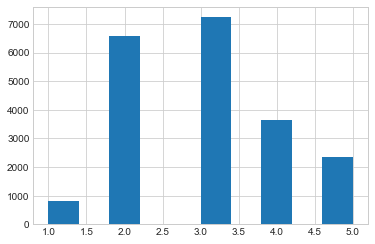

In [22]:
housing["income_categories"].hist()

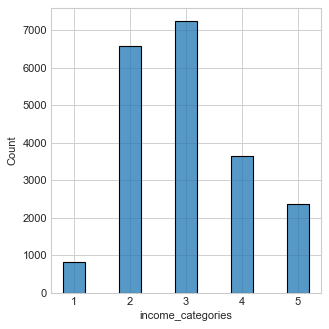

In [23]:
_, ax = plt.subplots(figsize=(4, 4), dpi=80, constrained_layout=True)

sns.histplot(housing["income_categories"], bins=10, shrink=0.4, ax=ax)
plt.show()

#### Go on stratified sampling with StratifiedShuffleSplit


In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_categories"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [25]:
strat_train_set.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16354
population            16512
households            16512
median_income         16512
median_house_value    16512
ocean_proximity       16512
income_categories     16512
dtype: int64

In [26]:
strat_test_set.count()

longitude             4128
latitude              4128
housing_median_age    4128
total_rooms           4128
total_bedrooms        4079
population            4128
households            4128
median_income         4128
median_house_value    4128
ocean_proximity       4128
income_categories     4128
dtype: int64

In [27]:
# Compare the stratify sampling with the overall sampling

# strat_test_set['income_categories'].value_counts() / len(strat_test_set)
# housing['income_categories'].value_counts() / len(housing)

# Of course we can make a dataframe
# to compare all the three sampling methods:

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

mthds = ["Overall", "Stratified", "Random"]
dfs = [housing, strat_test_set, test_set]

compare_props = []

for i in range(3):
    incom_cat_props = dfs[i]["income_categories"].value_counts() / len(dfs[i])
    compare_props.append(incom_cat_props)

compare_props = pd.DataFrame(compare_props).T.set_axis(mthds, axis=1, inplace=False)

compare_props["Rand. %error"] = (
    100 * compare_props["Random"] / compare_props["Overall"] - 100
)
compare_props["Strat. %error"] = (
    100 * compare_props["Stratified"] / compare_props["Overall"] - 100
)

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
3,0.350581,0.350533,0.358527,2.266446,-0.013820
2,0.318847,0.318798,0.324370,1.732260,-0.015195
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674
1,0.039826,0.039971,0.040213,0.973236,0.364964


As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is skewed.


#### We spent quite a bit of time on test set generation **for a good reason**:

 - This is an often neglected but ritical part of a Machine Learning project. 
 
- Moreover, many of these ideas will be useful later when we discuss crossvalidation. 

## Discover and Visualize the Data to Gain Insights


If the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. 

In our case, the set is quite small, so you can just work directly on the full set. Let’s create a copy so that you can play with it without harming the training set:

In [28]:
housing = strat_train_set.copy()

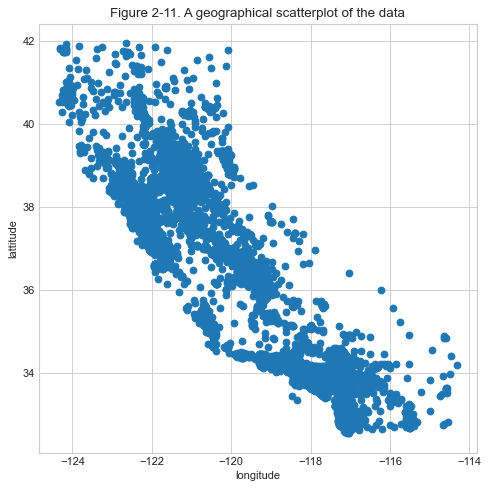

In [29]:
_, ax = plt.subplots(figsize=(6, 6), dpi=80, constrained_layout=True)

ax.scatter(data=housing, x="longitude", y="latitude")
plt.savefig("./img/2.11_bad_visualization_plot.png")
ax.set(
    xlabel="longitude",
    ylabel="lattitude",
    title="Figure 2-11. A geographical scatterplot of the data",
)
plt.show()

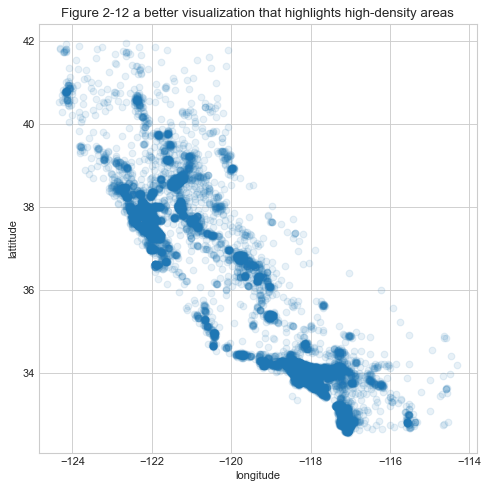

In [30]:
_, ax = plt.subplots(figsize=(6, 6), dpi=80, constrained_layout=True)

ax.scatter(data=housing, x="longitude", y="latitude", alpha=0.1)
ax.set( 
    xlabel="longitude",
    ylabel="lattitude",
    title="Figure 2-12 a better visualization that highlights high-density areas",
)
plt.savefig("./img/2.12_better_visualization_plot.png")
plt.show()

Now that’s much better: you can clearly see the high-density areas.

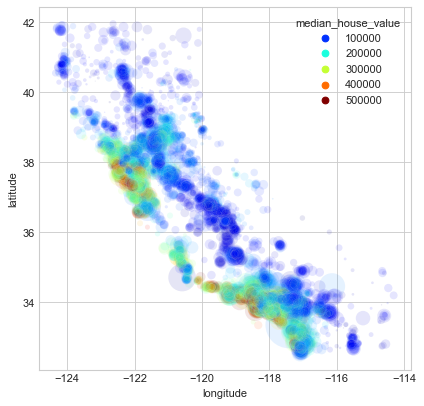

In [31]:
_, ax = plt.subplots(figsize=(6, 6), dpi=80)

sns.set_context(font_scale=2)

g = sns.scatterplot(
    data=housing,
    x="longitude",
    y="latitude",
    alpha=0.1,
    ax=ax,
    hue="median_house_value",  # for colors below
    s=housing["population"] / 20,
    palette=plt.get_cmap("jet"),
)
plt.savefig("./img/2.12.5_better_colors_visualization_plot.png")
plt.show()

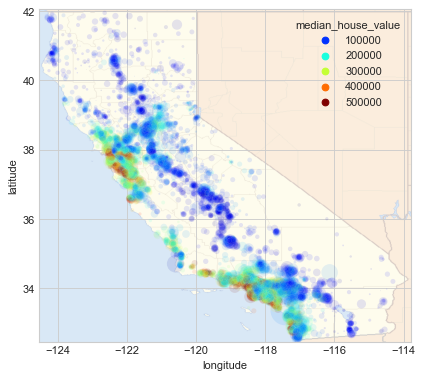

In [32]:
# Now intro Cali map jpeg
import matplotlib.image as mpimg

california_img = mpimg.imread("./img/california.png")

_, ax = plt.subplots(figsize=(6, 6), dpi=80)

sns.set_context(font_scale=2)

g = sns.scatterplot(
    data=housing,
    x="longitude",
    y="latitude",
    alpha=0.1,
    ax=ax,
    hue="median_house_value",  # for colors below
    s=housing["population"] / 50,
    palette=plt.get_cmap("jet"),
)

# Now for cal map:
ax.imshow(
    california_img,
    alpha=0.4,
    extent=[-124.55, -113.80, 32.45, 42.05],
    cmap=plt.get_cmap("jet"),
)
plt.savefig("./img/2.13_Cali_housing_prices.png")
plt.show()

## Looking for Correlations

Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method

In [33]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [34]:
midHval = corr_matrix["median_house_value"].sort_values(ascending=False)

In [35]:
attrs = midHval.index[0:4]
attrs

Index(['median_house_value', 'median_income', 'total_rooms',
       'housing_median_age'],
      dtype='object')

Now we can see there are correlations among:

    median_house_value    1.000000
    median_income         0.687160
    total_rooms           0.135097
    housing_median_age    0.114110

So plot a corr matrix by sns:

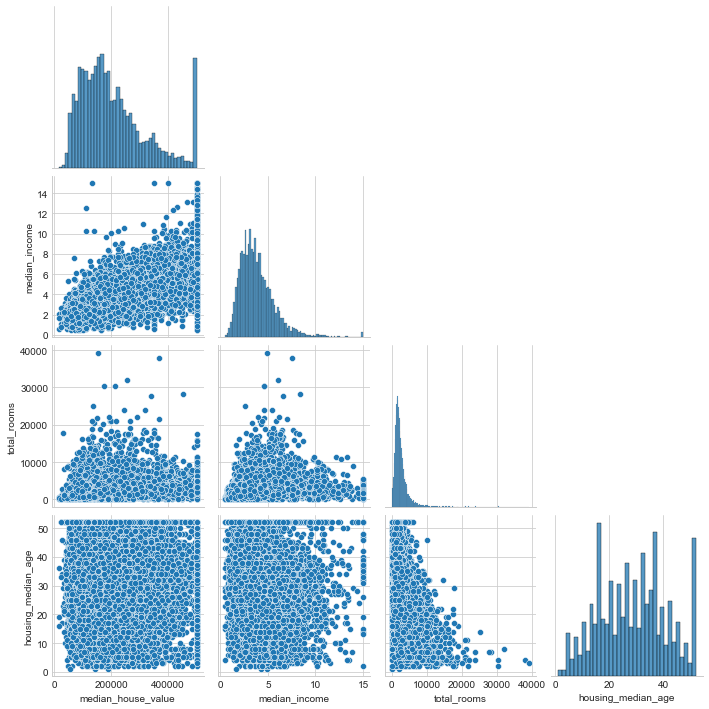

In [36]:
g = sns.pairplot(housing[attrs],corner=True)

plt.show()
# very slow take it easy

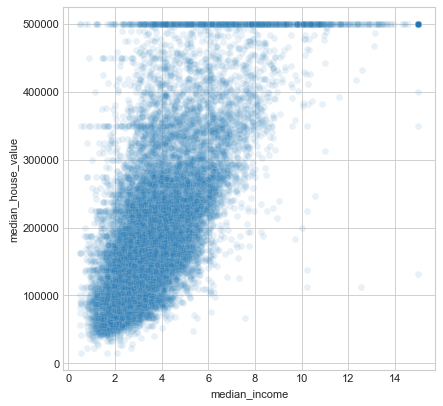

In [37]:
_, ax = plt.subplots(figsize=(6, 6), dpi=80)

g = sns.scatterplot(
    data=housing, x="median_income", y="median_house_value", alpha=0.1, ax=ax
)
plt.show()

This plot reveals a few things:

- First, the correlation is indeed very strong; you can clearly see the upward trend, and the points are not too dispersed. 

- Second, the price cap that we noticed earlier is clearly visible as a horizontal line at $500,000. 

- **However, This plot reveals other less obvious straight lines**: 

a horizontal line around 450,000 dollars, another around 350,000 dollars perhaps one around $280,000, and a few more below that.

**You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.**


### Dataprep library

In [38]:
# from dataprep import eda

In [39]:
# check missing values
housing.isnull().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.009569
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
income_categories     0.000000
dtype: float64

In [40]:
# eda.plot_missing(housing)

In [41]:
# correlation plot:
# eda.plot_correlation(housing)

In [42]:
housing_corr = housing.corr()
housing_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [43]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_categories
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


In [44]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [45]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_categories,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3,6.096552,0.182692,3.167241


In [46]:
housing_corr = housing.corr()  # new features
housing_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.028374,0.095645,-0.000415
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.107665,-0.116955,0.005426
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.147184,0.136768,0.015031
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.127549,-0.192655,-0.024806
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.000426,0.086883,-0.028364
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,-0.074665,0.037736,0.076232
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,-0.082971,0.067090,-0.027411
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,0.311528,-0.624650,0.021815
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,0.146255,-0.259952,-0.021991
rooms_per_household,-0.028374,0.107665,-0.147184,0.127549,0.000426,-0.074665,-0.082971,0.311528,0.146255,1.000000,-0.398529,-0.005316


In [47]:
housing_corr["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [48]:
housing.columns[-3:]

Index(['rooms_per_household', 'bedrooms_per_room', 'population_per_household'], dtype='object')

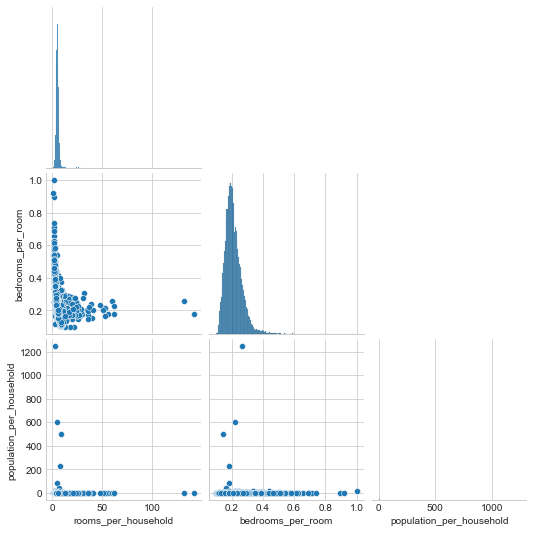

In [49]:
attrs_per = housing.columns[-3:]

g = sns.pairplot(housing[attrs_per], corner=True)

In [50]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Prepare the data for Machine Learning algorithms

### Revert to a clean training set (by copying strat_train_set once again).

In [51]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Data Cleaning Most Machine Learning algorithms cannot work with missing features。 We saw earlier that the total_bedrooms attribute has some missing values, so let’s fix this. You have three options:

1. Get rid of the corresponding districts.
    - housing.dropna(subset=["total_bedrooms"])    `# option 1` 
2. Get rid of the whole attribute.
    - housing.drop("total_bedrooms", axis=1)       `# option 2`
3. Set the values to some value (zero, the mean, the median, etc.).
      - median = housing["total_bedrooms"].median()   `# option 3` 
      - housing["total_bedrooms"].fillna(median, inplace=True)

In [52]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]

In [53]:
sample_incomplete_rows.shape

(158, 10)

In [54]:
sample_incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_categories
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5


In [55]:
# total_bedrooms = nan, drop
# option 1:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_categories


In [56]:
sample_incomplete_rows.shape

(158, 10)

In [57]:
sample_incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_categories
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5


In [58]:
# option 2
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_categories
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN,5
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,3207.0,1012.0,4.0767,INLAND,3
4691,-118.37,34.07,50.0,2519.0,1117.0,516.0,4.3667,<1H OCEAN,3
9149,-118.50,34.46,17.0,10267.0,4956.0,1483.0,5.5061,<1H OCEAN,4
16757,-122.48,37.70,33.0,4492.0,3477.0,1537.0,3.0546,NEAR OCEAN,3


In [59]:
# option 3
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_26846/251912102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)


In [60]:
sample_incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_categories
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN,5


Scikit-Learn provides a handy class to take care of missing values: `SimpleImputer`:

In [61]:
from sklearn.impute import SimpleImputer

# create a SimpleImputer instance,
# specifying that you want to replace each attribute’s missing values
# with the median of that attribute:

imputer = SimpleImputer(strategy="median")

In [62]:
# Since the median can only be computed on numerical attributes,
# you need to create a copy of the data.
# without the text attribute ocean_proximity:

housing_num = housing.drop("ocean_proximity", axis=1)

In [63]:
# fit the imputer instance to the training data using the fit() method
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [64]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [65]:
housing_num.median().values

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_26846/3605723347.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

`imputer.statistics_` and `housing_num.median().values` are equal right?
Ok, what is the replacing method again? Try `strategy`

In [66]:
imputer.strategy

'median'

Use this “trained” imputer to transform the training set **by replacing missing values with the learned medians**:

In [67]:
X = imputer.transform(housing_num)

In [68]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [69]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_categories
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0


In [70]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_categories
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,2.0
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,3.0
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,3.0
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,3.0
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,5.0
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,433.0,3207.0,1012.0,4.0767,3.0
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667,3.0
9149,-118.50,34.46,17.0,10267.0,433.0,4956.0,1483.0,5.5061,4.0
16757,-122.48,37.70,33.0,4492.0,433.0,3477.0,1537.0,3.0546,3.0


Issue:Why there is a "income_categories" col which is absent from the original code?
so get rid of this column firstly.




In [71]:
housing_tr = housing_tr.drop("income_categories", axis=1)

In [72]:
housing_tr.shape

(16512, 8)

### Handling Text and Categorical Attributes

In [73]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [74]:
housing_cat.value_counts()
# woo~~~ somebody bought islands!

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [75]:
from sklearn.preprocessing import OrdinalEncoder

Convert these categories from text to numbers. For this, we can use Scikit-Learn’s `OrdinalEncoder`

In [76]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [77]:
ordinal_encoder.categories_
# I like the housing_cat.value_counts()

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### OneHotEncoder

In [78]:
from sklearn.preprocessing import OneHotEncoder

Create one binary attribute per category with on-hot encoding,by`OneHotEncoder`

In [79]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [80]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [81]:
col_1hot = cat_encoder.categories_

ALso we can [convert the sparse matrix to a pd.DataFrame:](https://stackoverflow.com/questions/59339820/convert-a-numpy-float64-sparse-matrix-to-a-pandas-data-frame)

In [82]:
hotdf = pd.DataFrame(housing_cat_1hot.toarray(), columns=col_1hot)
hotdf.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0


In [83]:
# also again, dummmies help us:
pd.get_dummies(housing_cat).head(15)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0,1,0,0,0
15502,0,0,0,0,1
2908,0,1,0,0,0
14053,0,0,0,0,1
20496,1,0,0,0,0
1481,0,0,0,1,0
18125,1,0,0,0,0
5830,1,0,0,0,0
17989,1,0,0,0,0
4861,1,0,0,0,0


Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [84]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [85]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Create a  **custom transformer** to add extra attributes:

Custom Transformers:

- Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes. You will want your transformer to work seamlessly with Scikit-Learn func‐tionalities (such as pipelines), and since Scikit-Learn relies on **[duck typing](https://en.wikipedia.org/wiki/Duck_typing)** (not inher‐itance), all you need to do is create a class and implement three methods: fit() (returning self), transform(), and fit_transform().


You can get the last one for free by simply adding TransformerMixin as a base class.
If you add BaseEstimator as a base class (and avoid \*args and \**kargs in your con‐structor),you will also get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.
For example, here is a small transformer class that adds the combined attributes we discussed earlier:

In [86]:
# now remember:
housing_tr.iloc[:, 3:7].head(3)
# dowbelow: rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

,total_rooms,total_bedrooms,population,households
12655,3873.0,797.0,2237.0,706.0
15502,5320.0,855.0,2015.0,768.0
2908,1618.0,310.0,667.0,300.0


In [87]:
from sklearn.base import BaseEstimator, TransformerMixin

In [88]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[
                X, rooms_per_household, population_per_household, bedrooms_per_room
            ]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [89]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In this example the transformer has one hyperparameter, add_bedrooms_per_room, set to **True** by default (it is often helpful to provide sensible defaults).This hyperpara‐meter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. 

More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).

With this customized transformer,let's move on to the:
### Transformation Pipelines.

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [91]:
num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("attribs_adder", CombinedAttributesAdder()),
        ("std_scaler", StandardScaler()),
    ]
)

In [92]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [93]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

#### full_pipeline

In [94]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer(
    [
        ("num_pipline", num_pipeline, num_attribs),
        ("cat_pipeline", OneHotEncoder(), cat_attribs),
    ]
)

housing_prepared = full_pipeline.fit_transform(housing)

In [95]:
# just check, not for model training
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.954687,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.890078,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.954687,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.954687,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.006432,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.941823,0.466353,-0.092580,-0.443846,1.0,0.0,0.0,0.0,0.0
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,-0.954687,0.050362,0.023024,-0.516065,0.0,1.0,0.0,0.0,0.0
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.006432,-0.509240,-0.037436,0.322869,1.0,0.0,0.0,0.0,0.0
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,-0.006432,0.328149,-0.059156,-0.457023,1.0,0.0,0.0,0.0,0.0


In [96]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_categories']

In [97]:
cat_attribs

['ocean_proximity']

In [98]:
housing_prepared.shape

(16512, 17)

In [99]:
housing_labels.shape

(16512,)

### Select and train a model

#### LinearRegression

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [102]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print(
    f"Predictions: {lin_reg.predict(some_data_prepared)};\n Lables: {list(some_labels)}."
)

Predictions: [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745];
 Lables: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0].


In [103]:
# check
pd.DataFrame(some_data_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.954687,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.890078,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.954687,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.954687,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.006432,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0


Let’s measure this regression model’s RMSE on the whole training set using `ScikitLearn’s mean_squared_error()` function:

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [105]:
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(housing_labels, housing_predictions)

lin_r2 = r2_score(housing_labels, housing_predictions)

print(
    f"With Linear Regression Model,\
The Root Mean Squared Error is {lin_rmse},\
\nThe Mean Absolute Error is {lin_mae},\
\nThe R2 Score is {lin_r2}"
)

With Linear Regression Model,The Root Mean Squared Error is 68376.51254853733,
The Mean Absolute Error is 49507.34233776102,
The R2 Score is 0.650728025974693


This is an example of a model **underfitting** the training data.

#### DecisionTreeRegression

Here comes the `DecisionTreeRegressor` models:

In [106]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [107]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_mae = mean_absolute_error(housing_labels, housing_predictions)

tree_r2 = r2_score(housing_labels, housing_predictions)

print(
    f"With the Decision Tree Regression Model,\
The Root Mean Squared Error is {tree_rmse},\
\nThe Mean Absolute Error is {tree_mae},\
\nThe R2 Score is {tree_r2}"
)

With the Decision Tree Regression Model,The Root Mean Squared Error is 0.0,
The Mean Absolute Error is 0.0,
The R2 Score is 1.0


In [108]:
# 0.0....just like a nerd looking at you, this is an overfit case.

##### Better Evaluation Using Cross-Validation

In [109]:
# Scikit-Learn’s K-fold cross-validation feature
from sklearn.model_selection import cross_val_score

In [110]:
scores = cross_val_score(
    tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10
) # notice the scoring metircs: neg_mean_squared_error
tree_rmse_scores = np.sqrt(-scores)

In [111]:
# book method:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


display_scores(tree_rmse_scores)

Scores: [72237.45096271 69208.53094621 69286.11573206 70612.13634405
 70577.30202088 76840.97092314 71823.83279699 72710.22512908
 67780.77127665 71678.17802175]
Mean: 71275.55141535088
Standard deviation: 2362.02756776275


In [112]:
# Or:
print(
    f"Scores:{tree_rmse_scores},\
\n Mean:{tree_rmse_scores.mean()},\
\n Standard deviation: {tree_rmse_scores.std()}"
)

Scores:[72237.45096271 69208.53094621 69286.11573206 70612.13634405
 70577.30202088 76840.97092314 71823.83279699 72710.22512908
 67780.77127665 71678.17802175],
 Mean:71275.55141535088,
 Standard deviation: 2362.02756776275


Compute the same scores for the Linear Regression model

In [113]:
lin_scores = cross_val_score(
    lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10
)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean: 68897.63006613276
Standard deviation: 3002.746127534868


#### RandomForestRegression

Compute the same scores for `RandomForestRegressor`

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [116]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_mae = mean_absolute_error(housing_labels, housing_predictions)

forest_r2 = r2_score(housing_labels, housing_predictions)

print(
    f"With the Random Forest Regression Model,\
\nThe Root Mean Squared Error is {forest_rmse},\
\nThe Mean Absolute Error is {forest_mae},\
\nThe R2 Score is {forest_r2}"
)

With the Random Forest Regression Model,
The Root Mean Squared Error is 18675.224916252282,
The Mean Absolute Error is 12093.038100775195,
The R2 Score is 0.9739455729137559


In [117]:
forest_scores = cross_val_score(
    forest_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10,
)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51553.65292335 48797.89565614 47005.23947642 52046.73567245
 47700.78025873 51824.08544879 52582.59165129 49949.79025967
 48680.25622229 54019.67674791]
Mean: 50416.070431704204
Standard deviation: 2201.612779754884


#### Support Vector Regression

In [118]:
from sklearn.svm import SVR

In [119]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)

In [120]:
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)


svm_mae = mean_absolute_error(housing_labels, housing_predictions)

svm_r2 = r2_score(housing_labels, housing_predictions)

print(
    f"With the Support Vector Regression Model,\
The Root Mean Squared Error is {svm_rmse},\
\nThe Mean Absolute Error is {svm_mae},\
\nThe R2 Score is {svm_r2}"
)

With the Support Vector Regression Model,The Root Mean Squared Error is 106873.526604078,
The Mean Absolute Error is 78265.55079719574,
The R2 Score is 0.14672282833673012


In [121]:
svm_scores = cross_val_score(
    svm_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10
)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [106846.91418486 108840.55721006 103122.02433423 109649.5401006
 103796.57205905 112219.65143015 109351.47147536 107877.83853403
 109166.01514235 108053.90140047]
Mean: 107892.44858711655
Standard deviation: 2590.6419916301356


### Fine Tune Model

In [122]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [123]:
param_distribs = {
    "n_estimators": randint(low=1, high=200),
    "max_features": randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=200)
rnd_search = RandomizedSearchCV(
    forest_reg,
    param_distributions=param_distribs,
    n_iter=10,
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=42,
)

In [124]:
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=200),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13d967e50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13d967eb0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [125]:
cv_rslts = rnd_search.cv_results_

for mean_score, params in zip(cv_rslts["mean_test_score"], cv_rslts["params"]):
    print(np.sqrt(-mean_score), params)

50012.458187298726 {'max_features': 7, 'n_estimators': 180}
51796.72213531412 {'max_features': 5, 'n_estimators': 15}
50867.40172649513 {'max_features': 3, 'n_estimators': 72}
51166.4915975668 {'max_features': 5, 'n_estimators': 21}
50026.14080052722 {'max_features': 7, 'n_estimators': 122}
50862.94522626273 {'max_features': 3, 'n_estimators': 75}
50716.62976365292 {'max_features': 3, 'n_estimators': 88}
49856.74936940663 {'max_features': 5, 'n_estimators': 100}
50767.70344800764 {'max_features': 3, 'n_estimators': 150}
64531.44263344986 {'max_features': 5, 'n_estimators': 2}


#### feature_importances

In [126]:
feature_impotances = rnd_search.best_estimator_.feature_importances_
feature_impotances

array([7.63962718e-02, 6.98698910e-02, 4.37670852e-02, 1.91735098e-02,
       1.93072541e-02, 1.99605713e-02, 1.83504445e-02, 2.40846710e-01,
       1.28739841e-01, 4.75569515e-02, 9.80704657e-02, 6.65016287e-02,
       1.19516022e-02, 1.31049381e-01, 8.41801889e-05, 3.95738886e-03,
       4.41682275e-03])

In [127]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.740295,2.253216,0.185140,0.032451,7,180,"{'max_features': 7, 'n_estimators': 180}",-2.501088e+09,-2.431934e+09,-2.405033e+09,-2.569928e+09,-2.598247e+09,-2.501246e+09,7.508323e+07,2
1,1.690577,0.194765,0.026063,0.003110,5,15,"{'max_features': 5, 'n_estimators': 15}",-2.768192e+09,-2.622838e+09,-2.665304e+09,-2.630920e+09,-2.727249e+09,-2.682900e+09,5.632134e+07,9
2,4.673363,2.522963,0.165747,0.169479,3,72,"{'max_features': 3, 'n_estimators': 72}",-2.596647e+09,-2.534416e+09,-2.470143e+09,-2.651162e+09,-2.685096e+09,-2.587493e+09,7.778459e+07,7
3,0.890045,0.111439,0.024755,0.008383,5,21,"{'max_features': 5, 'n_estimators': 21}",-2.680454e+09,-2.544900e+09,-2.599432e+09,-2.591333e+09,-2.673930e+09,-2.618010e+09,5.182319e+07,8
4,6.302744,0.481607,0.143108,0.055087,7,122,"{'max_features': 7, 'n_estimators': 122}",-2.495040e+09,-2.428398e+09,-2.425537e+09,-2.573517e+09,-2.590581e+09,-2.502615e+09,6.967296e+07,3
5,1.851022,0.050556,0.063517,0.003948,3,75,"{'max_features': 3, 'n_estimators': 75}",-2.596567e+09,-2.532839e+09,-2.472293e+09,-2.647228e+09,-2.686269e+09,-2.587039e+09,7.702497e+07,6
6,2.090769,0.061040,0.075247,0.003253,3,88,"{'max_features': 3, 'n_estimators': 88}",-2.582359e+09,-2.504018e+09,-2.465625e+09,-2.629081e+09,-2.679799e+09,-2.572177e+09,7.864247e+07,4
7,3.673014,0.055823,0.084421,0.005774,5,100,"{'max_features': 5, 'n_estimators': 100}",-2.502429e+09,-2.398730e+09,-2.419065e+09,-2.530264e+09,-2.577989e+09,-2.485695e+09,6.750858e+07,1
8,3.567549,0.149264,0.131925,0.019388,3,150,"{'max_features': 3, 'n_estimators': 150}",-2.578542e+09,-2.500341e+09,-2.484037e+09,-2.643553e+09,-2.680326e+09,-2.577360e+09,7.697558e+07,5
9,0.068078,0.001480,0.002364,0.000105,5,2,"{'max_features': 5, 'n_estimators': 2}",-4.412451e+09,-4.212487e+09,-4.164139e+09,-3.835604e+09,-4.196855e+09,-4.164307e+09,1.860119e+08,10


#### rnd_search.best_estimator_

In [128]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=5, random_state=200)

In [129]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_encoder = full_pipeline.named_transformers_["cat_pipeline"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_impotances, attributes), reverse=True)

[(0.2408467103060683, 'median_income'),
 (0.13104938108875358, 'INLAND'),
 (0.1287398410795927, 'income_categories'),
 (0.09807046571035752, 'pop_per_hhold'),
 (0.07639627176589533, 'longitude'),
 (0.0698698910258932, 'latitude'),
 (0.06650162868068342, 'bedrooms_per_room'),
 (0.04755695153628664, 'rooms_per_hhold'),
 (0.043767085186115835, 'housing_median_age'),
 (0.019960571255196787, 'population'),
 (0.01930725405020358, 'total_bedrooms'),
 (0.019173509791003046, 'total_rooms'),
 (0.01835044454025291, 'households'),
 (0.011951602180377819, '<1H OCEAN'),
 (0.004416822752103268, 'NEAR OCEAN'),
 (0.003957388862356893, 'NEAR BAY'),
 (8.418018885921255e-05, 'ISLAND')]

In [130]:
cat_encoder = full_pipeline.named_transformers_["cat_pipeline"]  # OneHotEncoder()
cat_one_hot_attribs = list(cat_encoder.categories_[0])
# cat_encoder.categories_[0]:
# array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],dtype=object)

In [131]:
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [132]:
final_rmse

47519.201531694394

#### Confidence Interval

In [133]:
from scipy import stats

In [134]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2

In [135]:
# Compute the confidence interval

confidence_interval = np.sqrt(
    stats.t.interval(
        confidence,
        df=len(squared_errors) - 1,  # degree of freedom
        loc=squared_errors.mean(),  # mu
        scale=stats.sem(squared_errors),
    )  # sigma
)

print(
    f"The final model is: {rnd_search.best_estimator_},\nThe Confidence Interval is {confidence_interval}"
)

The final model is: RandomForestRegressor(max_features=5, random_state=200),
The Confidence Interval is [45559.87641088 49400.87741978]


Another way to compute t-score (reverse calculation)

In [136]:
squared_errors.shape

(4128,)

In [137]:
# sample volume:
m = len(squared_errors)
# mean
sample_mean = squared_errors.mean()
# based on the degrees of freedom, calculate t-ditstibution
t_score = stats.t.ppf((1 + confidence)/2, df = m -1)
t_score

1.9605389676490623

In [138]:
t_margin = t_score * squared_errors.std(ddof=1)/np.sqrt(m)
t_margin

182372175.63470584

In [139]:
np.sqrt(sample_mean - t_margin),np.sqrt(sample_mean + t_margin)

(45559.87641088463, 49400.87741978368)

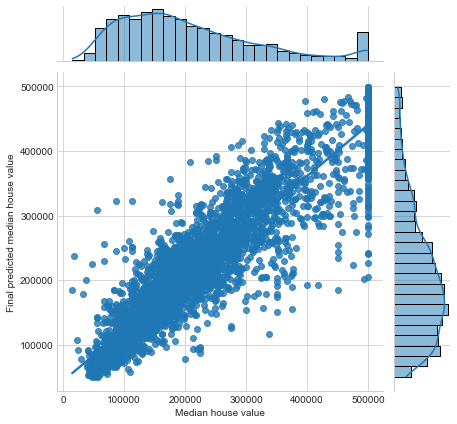

In [140]:
j = sns.jointplot(x=y_test, y=final_predictions, kind="reg", ci=95)

j.set_axis_labels(
    xlabel="Median house value", ylabel="Final predicted median house value"
)

[Text(0.5, 0, 'Median house value'),
 Text(0, 0.5, 'Final predicted median house value')]

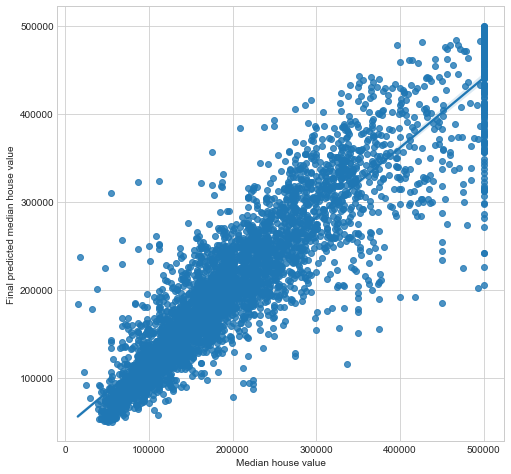

In [141]:
_, ax = plt.subplots(figsize=(8, 8))

g = sns.regplot(
    x=y_test,
    y=final_predictions,
    ci=95,  ## defalut ci: confidence interval 95%
)
g.set(xlabel="Median house value", ylabel="Final predicted median house value")

# Extra material

## A full pipeline with both preparation and prediction

In [142]:
full_pipline_with_preditor = Pipeline(
    [("preparation", full_pipeline), ("linear", LinearRegression())]
)

In [143]:
full_pipline_with_preditor.fit(housing, housing_labels)
full_pipline_with_preditor.predict(some_data)

array([ 83811.08312039, 314388.27147935, 145641.85902864, 183704.64921202,
       238729.66725745])

## Example SciPy distributions for `RandomizedSearchCV`

In [144]:
from scipy.stats import expon, geom

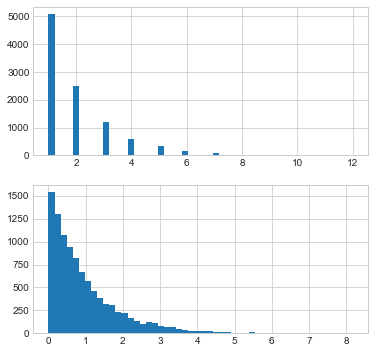

In [145]:
geom_distrib = geom(0.5).rvs(10000, random_state=42)
expon_distrib = expon(scale=1).rvs(10000, random_state=42)

_, ax = plt.subplots(2, 1, figsize=(6, 6))

ax[0].hist(geom_distrib, bins=50)
ax[1].hist(expon_distrib, bins=50)
plt.show()

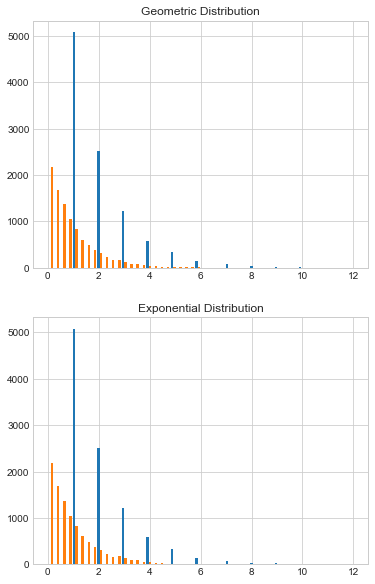

In [146]:
# Modify:

_, axes = plt.subplots(2, 1, figsize=(6, 10))

titles = ["Geometric Distribution", "Exponential Distribution"]
dists = [geom_distrib, expon_distrib]

for ax, dist, title in zip(axes.flatten(), dists, titles):
    ax.hist(dists, bins=50)
    ax.set(title=title)
plt.show()

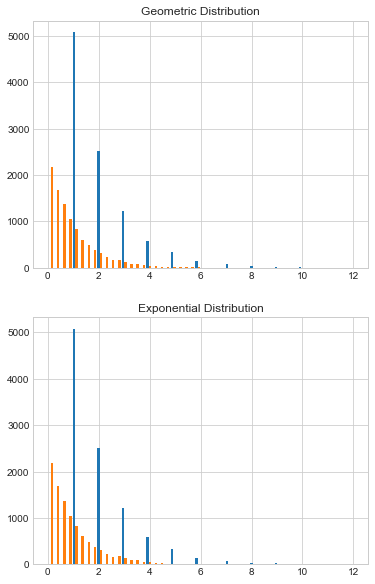

In [147]:
# Modify:

_, axes = plt.subplots(2, 1, figsize=(6, 10))

titles = ["Geometric Distribution", "Exponential Distribution"]
dists = [geom_distrib, expon_distrib]

for ax, dist, title in zip(axes, dists, titles):
    ax.hist(dists, bins=50)
    ax.set(title=title)
plt.show()

In [148]:
from scipy.stats import expon, reciprocal

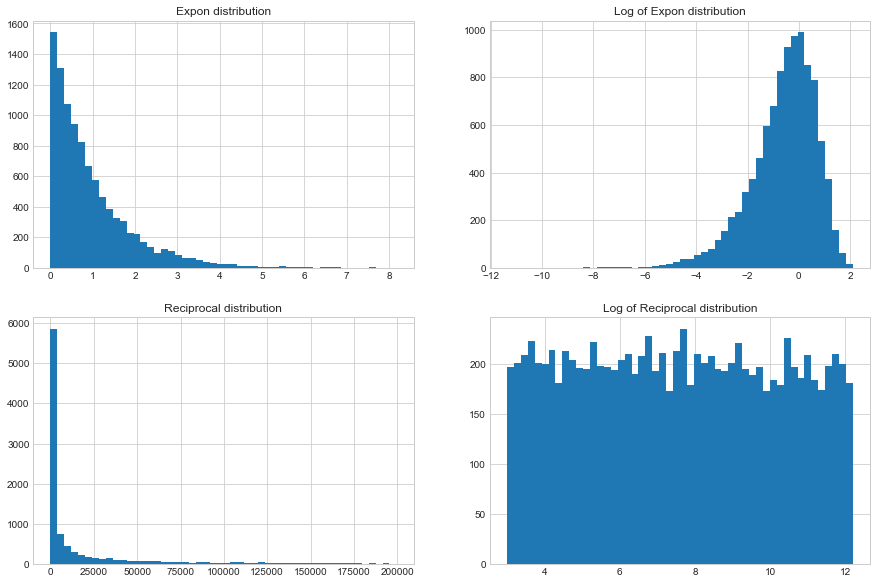

In [149]:
expon_distrib = expon(scale=1).rvs(10000, random_state=42)
reciprocal_distrib = reciprocal(20, 200000).rvs(10000, random_state=42)

_, axes = plt.subplots(2, 2, figsize=(15, 10))

titles = [
    "Expon distribution",
    "Log of Expon distribution",
    "Reciprocal distribution",
    "Log of Reciprocal distribution",
]

dists = [
    expon_distrib,
    np.log(expon_distrib),
    reciprocal_distrib,
    np.log(reciprocal_distrib),
]

for ax, dist, title in zip(axes.flatten(), dists, titles):
    ax.hist(dist, bins=50)
    ax.set(title=title)

plt.show()

# Excercise
## Question: 

Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
# param_grid = [
#         {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
#         {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
#          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
#     ]

# svm_reg = SVR()
# grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
# grid_search.fit(housing_prepared, housing_labels)

## Select only the most important attributes

In [152]:
from sklearn.base import BaseEstimator, TransformerMixin

In [153]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])


class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k

    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self

    def transform(self, X):
        return X[:, self.feature_indices_]

Note: this feature selector assumes that you have already computed the feature importances somehow (for example using a `RandomForestRegressor`). You may be tempted to compute them directly in the `TopFeatureSelector`'s `fit()` method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

Let's define the number of top features we want to keep:

In [154]:
k = 5

In [155]:
feature_impotances

array([7.63962718e-02, 6.98698910e-02, 4.37670852e-02, 1.91735098e-02,
       1.93072541e-02, 1.99605713e-02, 1.83504445e-02, 2.40846710e-01,
       1.28739841e-01, 4.75569515e-02, 9.80704657e-02, 6.65016287e-02,
       1.19516022e-02, 1.31049381e-01, 8.41801889e-05, 3.95738886e-03,
       4.41682275e-03])

Now let's look for the indices of the top k features:

In [156]:
top_k_feature_indices = indices_of_top_k(feature_impotances, k)
top_k_feature_indices

array([ 0,  7,  8, 10, 13])

In [157]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'income_categories', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [158]:
sorted(zip(feature_impotances, attributes), reverse=True)[:k]

[(0.2408467103060683, 'median_income'),
 (0.13104938108875358, 'INLAND'),
 (0.1287398410795927, 'income_categories'),
 (0.09807046571035752, 'pop_per_hhold'),
 (0.07639627176589533, 'longitude')]

Looking good... Now let's create **a new pipeline** that runs the previously defined :

    1.preparation pipeline;

    2.adds top k feature selection.

In [159]:
preparation_and_feature_selection_pipeline = Pipeline(
    [
        ("preparation", full_pipeline),
        ("feature_selection", TopFeatureSelector(feature_impotances, k)),
    ]
)

In [160]:
housing_prepared_top_k_features = (
    preparation_and_feature_selection_pipeline.fit_transform(housing)
)

Let's look at the features of the first 3 instances:

In [161]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046, -0.8936472 , -0.95468705,  0.00622264,  1.        ],
       [ 1.17178212,  1.292168  ,  1.89007821, -0.04081077,  0.        ],
       [ 0.26758118, -0.52543365, -0.95468705, -0.07537122,  1.        ]])

In [162]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046, -0.8936472 , -0.95468705,  0.00622264,  1.        ],
       [ 1.17178212,  1.292168  ,  1.89007821, -0.04081077,  0.        ],
       [ 0.26758118, -0.52543365, -0.95468705, -0.07537122,  1.        ]])

In [163]:
feature_impotances

array([7.63962718e-02, 6.98698910e-02, 4.37670852e-02, 1.91735098e-02,
       1.93072541e-02, 1.99605713e-02, 1.83504445e-02, 2.40846710e-01,
       1.28739841e-01, 4.75569515e-02, 9.80704657e-02, 6.65016287e-02,
       1.19516022e-02, 1.31049381e-01, 8.41801889e-05, 3.95738886e-03,
       4.41682275e-03])

## Question: 

Try creating a single pipeline that does the full data preparation plus the final prediction.

In [164]:
prepare_select_and_predict_pipeline = Pipeline(
    [
        ("preparation", full_pipeline),
        ("feature_selection", TopFeatureSelector(feature_importances, k)),
        ("svm_reg", SVR(**rnd_search.best_params_)),
    ]
)

NameError: name 'feature_importances' is not defined